In [1]:
import pandas as pd
import pickle

In [2]:
dataset=pd.read_csv("50_Startups.csv")

In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [4]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [6]:
dependent=dataset[['Profit']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [10]:
with open('deployment_model.pkl', 'wb') as file:
    pickle.dump({'x_train':x_train,'x_test':x_test,'y_train':y_train,'y_test':y_test,'independent':independent,'dependent':dependent,'scaler': sc, 'fitted_params': sc.get_params()}, file)

In [12]:
with open('deployment_model.pkl', 'rb') as file:
    saved_data = pickle.load(file)
    x_train = saved_data['x_train']
    x_test = saved_data['x_test']
    y_train = saved_data['y_train']
    y_test = saved_data['y_test']
    independent = saved_data['independent']
    dependent=saved_data['dependent']
    loaded_scaler = saved_data['scaler']
    fitted_params = saved_data['fitted_params']

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor( criterion='poisson', splitter='best')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson')

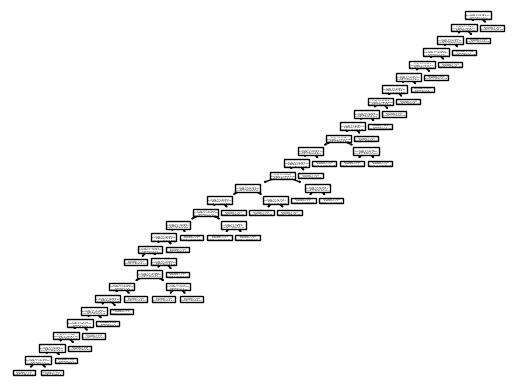

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [15]:
y_pred=regressor.predict(x_test)

In [16]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [17]:
r_score

0.6992778315589743

In [18]:
filename="finalized_model_dtpreinput.sav"

In [19]:
pickle.dump(regressor,open(filename,'wb'))
preinput=sc.transform([[12300,15000,582469,0,1]])
preinput

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-1.24209384, -4.22189678,  2.92496273, -0.5       ,  1.30088727]])

In [20]:
loaded_model=pickle.load(open("finalized_model_dtpreinput.sav","rb"))
result=loaded_model.predict(preinput)
result

array([192261.83])